<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Multiclass Clasification: MNIST</h2>
<div>

## Imports

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms
#from torch import pytorchtools

## Auxliary plotting function

In [2]:
# https://discuss.pytorch.org/t/view-classify-in-module-helper/30279/6

def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize =(6, 9), ncols =2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)


# Load MNIST Dataset
First up, we need to get our dataset. This is provided through the `torchvision` package. The code below will download the MNIST dataset, then create training and test datasets for us. Don't worry too much about the details here, you'll learn more about this later.

In [3]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)                  

# Download and load the test data
testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center" style="color:#01ff84">MNIST Clasification: Exercise</h2>
<div>

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 1:</h3>
  <p>Now it's your turn to build a simple network, use any method I've covered so far. In the next notebook, you'll learn how to train a network so it can make good predictions.</p>
  <p>Build a network to classify the MNIST images with 3 hidden layers. Use 400 units in the first hidden layer, 200 units in the second layer, and 100 units in the third layer. Each hidden layer should have a ReLU activation function, and use softmax on the output layer.</p>
<div>

In [4]:
# Hyperparameters for our network
input_size   = 784
hidden_sizes = [400, 200, 100]
output_size  = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
          ('fc1',   nn.Linear(input_size, hidden_sizes[0])),
          ('relu1', nn.ReLU()),
          ('fc2',   nn.Linear(hidden_sizes[0], hidden_sizes[1])),
          ('relu2', nn.ReLU()),
          ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
          ('relu3', nn.ReLU()),
          ('output',   nn.Linear(hidden_sizes[2], output_size)),
          #('softmax', nn.Softmax(dim=1))
          ]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
)

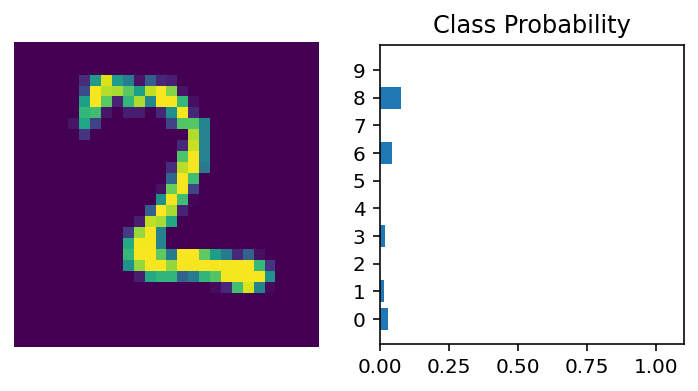

In [5]:
# Run this cell with your model to make sure it works
# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 2:</h3>
  <p>Train your network implementing the Pytorch training loop and <strong style="color:#01ff84">after each epoch, use the model for predicting the test (validation) MNIST data.</strong></p>
  <p>Note: If your model does not fit with the final softmax layer, you can remove this layer.</p>
  <p>Hint: <a href="https://discuss.pytorch.org/t/training-loop-checking-validation-accuracy/78399">Training loop checking validation accuracy
</a></p>
  <p>Research about <code>model.train()</code>, <code>model.eval()</code> and <code>with torch.no_grad()</code> in Pytorch.
<div>

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [7]:
num_epochs = 10
print_every = 20

for epoch in range(num_epochs):
    running_loss = 0
    print(f"Epoch: {epoch+1}/{num_epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):       

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)   
        loss = criterion(output, labels) 
        loss.backward()                  
        optimizer.step()                 
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0

Epoch: 1/10
	Iteration: 0	 Loss: 0.1152
	Iteration: 20	 Loss: 2.2980
	Iteration: 40	 Loss: 2.3000
	Iteration: 60	 Loss: 2.2976
	Iteration: 80	 Loss: 2.2998
	Iteration: 100	 Loss: 2.2950
	Iteration: 120	 Loss: 2.2999
	Iteration: 140	 Loss: 2.2958
	Iteration: 160	 Loss: 2.2942
	Iteration: 180	 Loss: 2.2936
	Iteration: 200	 Loss: 2.2955
	Iteration: 220	 Loss: 2.2952
	Iteration: 240	 Loss: 2.2887
	Iteration: 260	 Loss: 2.2906
	Iteration: 280	 Loss: 2.2892
	Iteration: 300	 Loss: 2.2882
	Iteration: 320	 Loss: 2.2874
	Iteration: 340	 Loss: 2.2900
	Iteration: 360	 Loss: 2.2881
	Iteration: 380	 Loss: 2.2861
	Iteration: 400	 Loss: 2.2828
	Iteration: 420	 Loss: 2.2900
	Iteration: 440	 Loss: 2.2878
	Iteration: 460	 Loss: 2.2888
	Iteration: 480	 Loss: 2.2880
	Iteration: 500	 Loss: 2.2812
	Iteration: 520	 Loss: 2.2795
	Iteration: 540	 Loss: 2.2842
	Iteration: 560	 Loss: 2.2826
	Iteration: 580	 Loss: 2.2803
	Iteration: 600	 Loss: 2.2828
	Iteration: 620	 Loss: 2.2797
	Iteration: 640	 Loss: 2.2776
	Ite

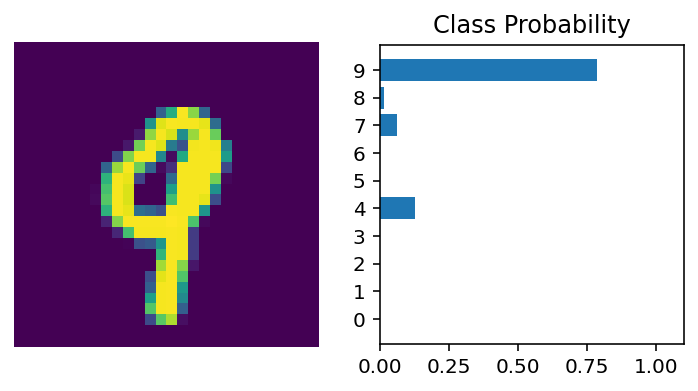

In [8]:
# Run this cell with your model to make sure it works and predicts well for the validation data
images, labels = next(iter(testloader))
images.resize_(images.shape[0], 1, 784)
logits = model.forward(images[0,:])
ps = F.softmax(logits, dim=1)
view_classify(images[0].view(1, 28, 28), ps)

<div style="background:#222222; color:#ffffff; padding:20px">
  <h3 style="color:#01ff84; margin-top:4px">Exercise 3:</h3>
  <p>Write the code for adding <strong style="color:#01ff84">Early Stopping with patience = 2</strong> to the training loop from scratch.</p>
  <p><strong style="color:#01ff84">Hint:</strong> Monitor the Validation loss every epoch, and if in 2 epochs, the validation loss does not improve, stop the training loop with <code>break</code>.</p>
<div>

In [18]:
def train(num_epochs, optimizer, criterion, trainloader):

    # Early stopping
    the_last_loss = 100
    patience = 2
    trigger_times = 0
    num_epochs = 10
    print_every = 20


    for epoch in range(num_epochs):
        running_loss = 0
        print(f"Epoch: {epoch+1}/{num_epochs}")
        
        model.train()

        for i, (images, labels) in enumerate(iter(trainloader)):       

            # Flatten MNIST images into a 784 long vector
            images.resize_(images.size()[0], 784)
            
            optimizer.zero_grad()
            
            output = model.forward(images)   
            loss = criterion(output, labels) 
            loss.backward()                  
            optimizer.step()                 
            
            running_loss += loss.item()
            
            if i % print_every == 0:
                print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
                running_loss = 0



        # Early stopping
        the_current_loss = test(trainloader, criterion)
        print('The current loss:', the_current_loss)

        if the_current_loss > the_last_loss:
            trigger_times += 1
            print('trigger times:', trigger_times)

            if trigger_times >= patience:
                print('Early stopping!\nStart to test process.')
                #return model

        else:
            print('trigger times: 0')
            trigger_times = 0

        the_last_loss = the_current_loss

    #return model

train(num_epochs, optimizer, criterion, trainloader)



# test model
def test(testloader):

    # Settings
    model.eval()
    total = 0
    correct = 0

    with torch.no_grad():
        for images, labels in testloader:
            images.resize_(images.size()[0], 784)

            output = model.forward(images)
            _, predicted = torch.max(output.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accurcy:', correct / total)

test(testloader)


Epoch: 1/10
	Iteration: 0	 Loss: 0.0223
	Iteration: 20	 Loss: 0.4589
	Iteration: 40	 Loss: 0.4586
	Iteration: 60	 Loss: 0.4568
	Iteration: 80	 Loss: 0.4357
	Iteration: 100	 Loss: 0.4168
	Iteration: 120	 Loss: 0.4064
	Iteration: 140	 Loss: 0.4322
	Iteration: 160	 Loss: 0.4228
	Iteration: 180	 Loss: 0.4691
	Iteration: 200	 Loss: 0.4670
	Iteration: 220	 Loss: 0.4319
